# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [53]:
import statistics # ADD
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

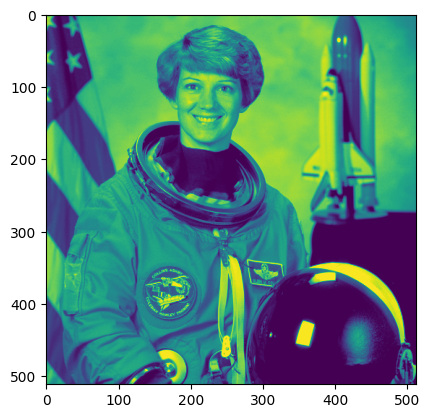

In [54]:
img = plt.imread('data/astronaut.png')
plt.imshow(img)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [55]:
# Borderproblem!!!

def meanfilter(img, size):
    result = numpy.zeros(img.shape) # creates empty img
    n = (size - 1) // 2 # size is a odd number ->
    for p in numpy.ndindex(img.shape): # p iterates over rows and colums
        if p[0] < img.shape[0] - n and p[1] < img.shape[1] - n and p[0] >= n and p[1] >= n: # 
            neighborhood_sum = 0 # introduce a new variable for the sum of the neighborhood
            for q in numpy.ndindex(size, size): # q iterates over the mean filters rows and colums
                neighborhood_sum += img[p[0] + q[0] - n,p[1] + q[1] - n] # calculate neighborhood sum
            result[p] = neighborhood_sum/(size ** 2)
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

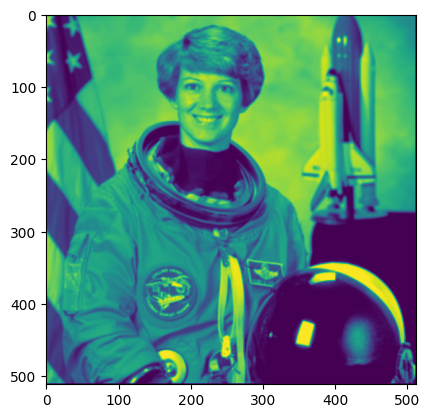

In [56]:
img3 = meanfilter(img, 3)
plt.imshow(img3)

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

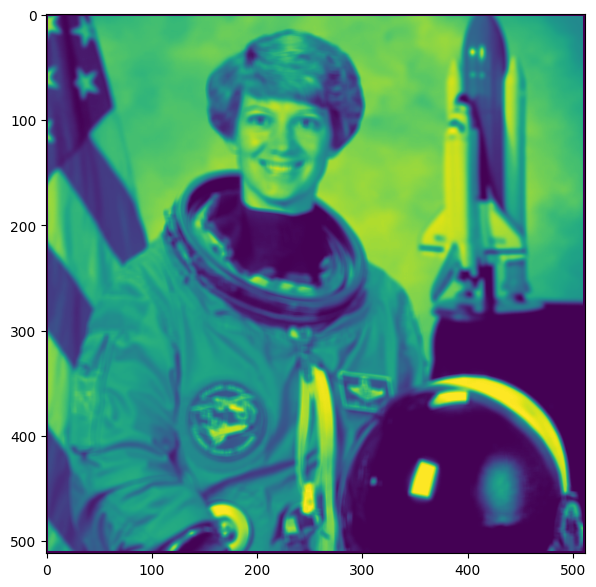

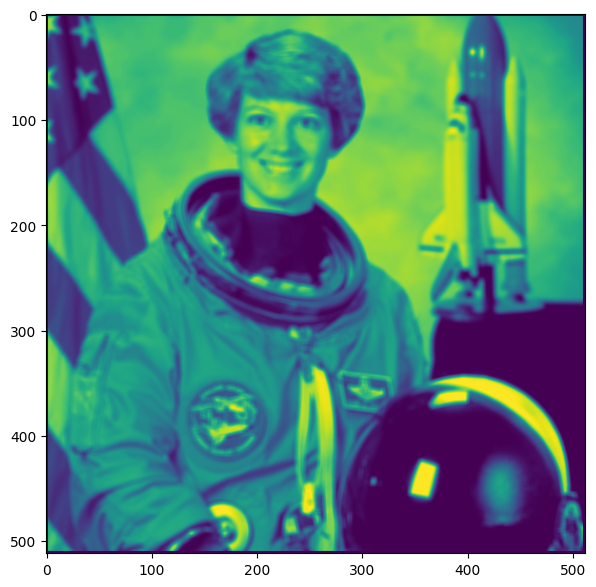

In [ ]:
img5 = meanfilter(img, 5)
# filtered image
plt.figure(figsize=(10,7))
plt.imshow(img5)

# control image 
plt.figure(figsize=(10,7))
img_control = plt.imread('data/astronaut_meanfilter5.png')
plt.imshow(img_control)

# assert (img5 == img_control).all()
assert numpy.allclose(img5[10:-10, 10:-10], img_control[10:-10, 10:-10], atol=1/255)
assert numpy.allclose(img5, img_control, atol=1/255) # pixel ist geshifted Fehler bei if 

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [58]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape) # creates empty img
    n = (size - 1) // 2 # size is a odd number ->
    for p in numpy.ndindex(img.shape): # p iterates over rows and colums
        if p[0] < img.shape[0] - n and p[1] < img.shape[1] - n and p[0] >= n and p[1] >= n: # Border for the array / without edge pixels
            list = []
            for q in numpy.ndindex(size, size): # q iterates over the mean filters rows and colum
                list = list + [img[p[0] + q[0] - n,p[1] + q[1] - n]]
            result[p] = statistics.median(list) # or with if -> odd or even lenght() -> element in the middle or sum...
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

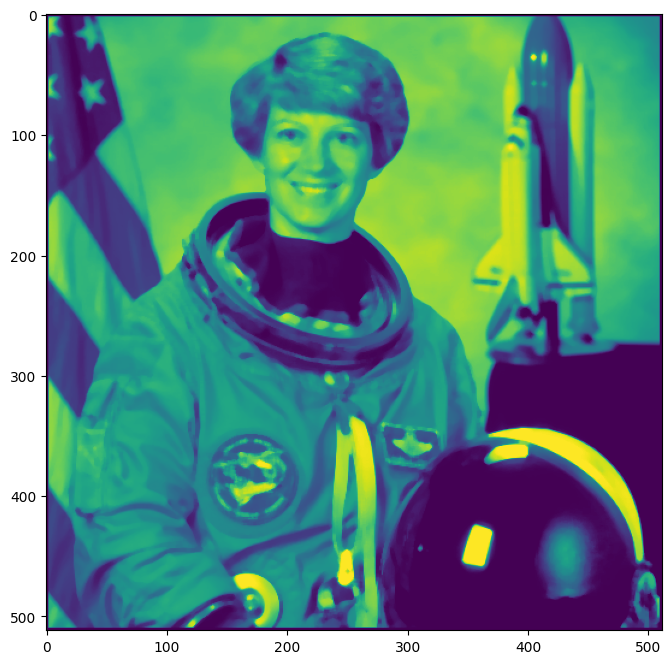

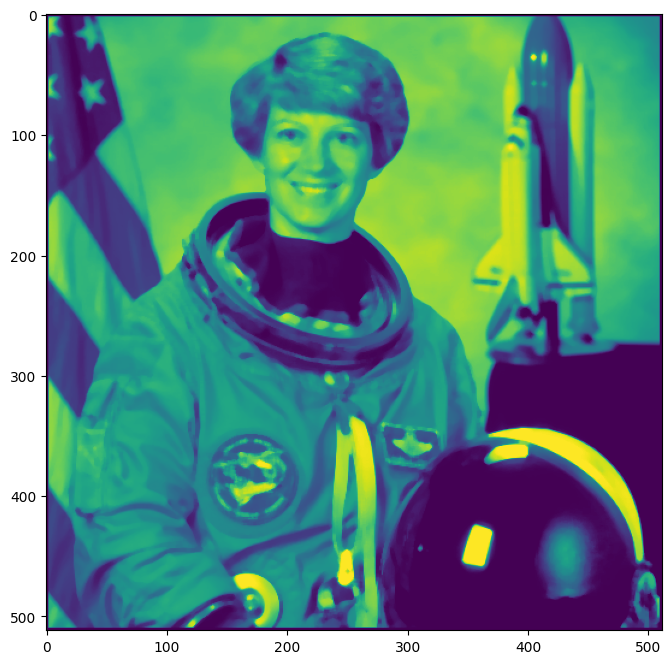

In [59]:
img_median = medianfilter(img, 5)
plt.figure(figsize=(15,8))
plt.imshow(img_median)
img_control_median = plt.imread('data/astronaut_medianfilter5.png')
plt.figure(figsize=(15,8))
plt.imshow(img_control_median)

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [60]:
print(img_median)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.67450982 ... 0.4627451  0.         0.        ]
 ...
 [0.         0.         0.67450982 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [61]:
print(img_control_median)

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.6745098 ... 0.4627451 0.        0.       ]
 ...
 [0.        0.        0.6745098 ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [62]:
assert numpy.allclose(img_median, img_control_median, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [63]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

In [64]:
size = 5
img_scipy_mean = scipy.ndimage.uniform_filter(img, size)
print(img_scipy_mean)

[[5.5639213e-01 5.2674508e-01 4.8627451e-01 ... 4.6494117e-01
  4.6399999e-01 4.6117646e-01]
 [6.0345101e-01 5.7678431e-01 5.4039216e-01 ... 4.6494117e-01
  4.6415687e-01 4.6211764e-01]
 [6.8690199e-01 6.6650981e-01 6.3937253e-01 ... 4.6399999e-01
  4.6321568e-01 4.6227449e-01]
 ...
 [6.7749023e-01 6.7341179e-01 6.6368628e-01 ... 5.8352944e-02
  1.6156863e-02 6.2745099e-04]
 [6.7529416e-01 6.6933340e-01 6.5709805e-01 ... 7.2313726e-02
  2.3686275e-02 9.4117655e-04]
 [6.7356867e-01 6.6666669e-01 6.5223533e-01 ... 8.4705882e-02
  2.6980393e-02 1.2549020e-03]]


**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

In [65]:
size = 5
img_scipy_median = scipy.ndimage.median_filter(img, size)
print(img_scipy_median)

[[0.58431375 0.58431375 0.5019608  ... 0.46666667 0.46666667 0.45490196]
 [0.58431375 0.58431375 0.58431375 ... 0.46666667 0.46666667 0.4627451 ]
 [0.69803923 0.69803923 0.6745098  ... 0.4627451  0.4627451  0.4627451 ]
 ...
 [0.6784314  0.6745098  0.6745098  ... 0.         0.         0.        ]
 [0.6745098  0.6745098  0.6666667  ... 0.         0.         0.        ]
 [0.6745098  0.67058825 0.6666667  ... 0.00392157 0.         0.        ]]


**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

In [66]:
size = 5
img_scipy_gaussian = scipy.ndimage.gaussian_filter(img, size)
print(img_scipy_gaussian)

[[0.66623956 0.6604061  0.6486627  ... 0.46766216 0.46713692 0.46686953]
 [0.6702521  0.6642933  0.6523067  ... 0.46765313 0.4671283  0.4668612 ]
 [0.67778456 0.67159164 0.6591509  ... 0.4676422  0.46711785 0.4668511 ]
 ...
 [0.64355105 0.6409695  0.63593686 ... 0.15446916 0.15048982 0.14839797]
 [0.64151293 0.6388731  0.6337366  ... 0.14819507 0.1437767  0.14145438]
 [0.640444   0.6377745  0.6325851  ... 0.14503583 0.14039955 0.13796286]]


**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

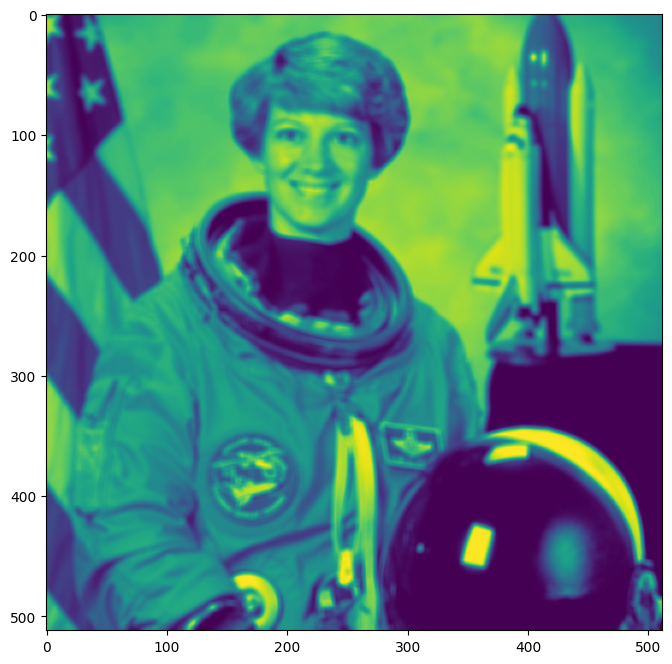

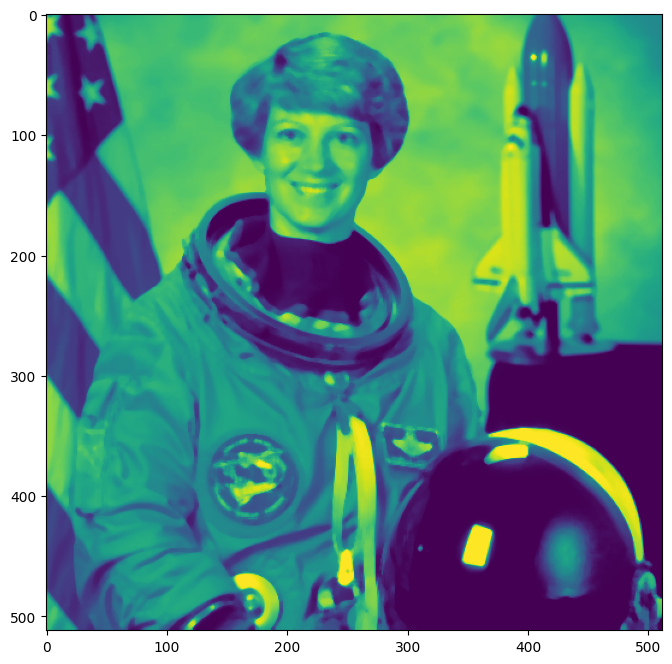

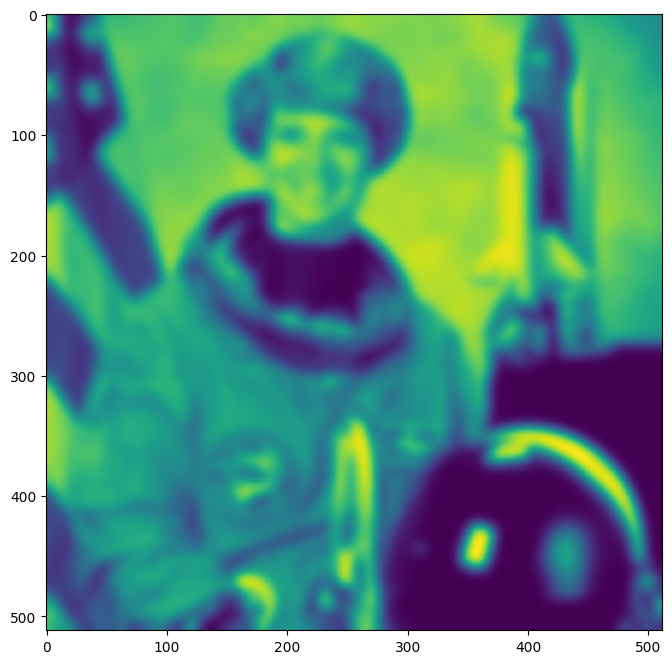

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(img_scipy_mean)
plt.figure(figsize=(15,8))
plt.imshow(img_scipy_median)
plt.figure(figsize=(15,8))
plt.imshow(img_scipy_gaussian)
# only one pixel edge!!! other?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfiltermedian(img, size):
    result = numpy.zeros(img.shape) # creates empty img
    n = (size - 1) // 2 # size is a odd number ->
    for p in numpy.ndindex(img.shape): # p iterates over rows and colums
        if p[0] < img.shape[0] - n and p[1] < img.shape[1] - n and p[0] >= n and p[1] >= n: # Border for the array / without edge pixels
            # create slices of the filter size

            #for q in numpy.ndindex(size, size): # q iterates over the mean filters rows and colum
            #   list = list + [img[p[0] + q[0] - n,p[1] + q[1] - n]]
            result[p] = statistics.median(img[slice(p, p[????], p[????])]) # or with if -> odd or even lenght() -> element in the middle or sum...
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: